In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
 
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,6)

/Users/hornsey/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.7.0'

In [3]:
x_data = np.random.rand(100).astype(np.float32)

In [4]:
y_data = x_data*3 + 2
y_data = np.vectorize(lambda y : y+np.random.normal(loc=0, scale=0.1))(y_data)

In [5]:
y_data[:10]

array([2.41685342, 4.17776094, 3.73389284, 2.0753196 , 3.95925837,
       3.91195233, 3.49232273, 4.99495676, 3.99238656, 3.78250537])

In [8]:
a=tf.Variable(1.0)
b=tf.Variable(0.2)

y = a*x_data + b

In [9]:
loss = tf.reduce_mean(tf.square(y - y_data))

In [10]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [19]:
train_data = []

for step in range(100):
    evals = sess.run([train, a, b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

TypeError: Fetch argument 2.5180392 has invalid type <class 'numpy.float32'>, must be a string or Tensor. (Can not convert a float32 into a Tensor or Operation.)

In [ ]:
    converter = plt.colors

    for f in train_data:
        [a,b] = f
        f_y = np.vectorize(lambda x : a*x + b)(x_data)
        line = plt.plot(x_data, f_y)
        plt.setp(line, color=(1,1,0))

        plt.plot(x_data, y_data, 'ro')
        fy = x_data.evals[0] + evals[1]
        line = plt.plot(x_data, f_y)
        plt.step(line, color=(0,0,1))
        f_line = mpatches.Patch(color='red', label='Data Points')
        plt.legend(handles=[f_line])
        plt.show()
        print(evals)

### 练习

In [24]:
a = tf.random_normal([2,20])
sess = tf.Session()
out = sess.run(a)
x,y = out

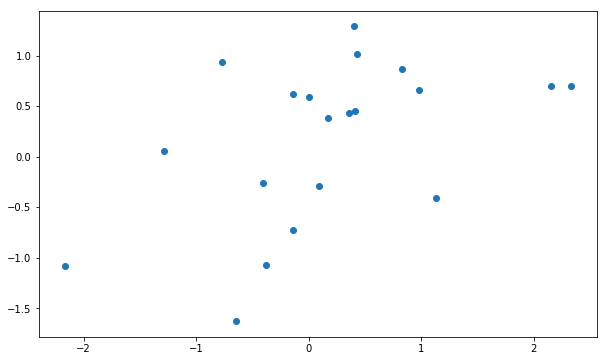

In [25]:
plt.scatter(x,y)
plt.show()

In [3]:
a = tf.constant(5, name='input_a')
b = tf.constant(3, name='input_b')
c = tf.multiply(a,b)
d = tf.add(a,b)
e = tf.add(c,d)

sess = tf.Session()
out = sess.run(e)

In [4]:
writer = tf.summary.FileWriter('./my_graph',sess.graph)

In [5]:
tensorboard --logdir="./my_graph"

SyntaxError: can't assign to operator (<ipython-input-5-50c2c456dba6>, line 1)

In [6]:
t_0 = np.array(10)

In [8]:
t_1 = np.array([b'apple', b'peach', b'grape'])

In [9]:
t_1

array([b'apple', b'peach', b'grape'], dtype='|S5')

In [15]:
type(t_1)

numpy.ndarray

In [13]:
s_1 = (3,2)

In [14]:
type(s_1)

tuple

In [16]:
g = tf.Graph()

In [17]:
type(g)

tensorflow.python.framework.ops.Graph

In [20]:
with g.as_default():
    a = tf.multiply(2,3)
    print(a)

Tensor("Mul_1:0", shape=(), dtype=int32)


In [21]:
in_default_graph = tf.add(1,2)

In [23]:
a = tf.add(3,5)
b = tf.multiply(a,4)

# sess = tf.Session()
sess.run(b, feed_dict={a:9})

36

In [30]:
a = tf.placeholder(np.int32, shape=[2], name='my_input')

b = tf.reduce_prod(a, name='prod_b')
c = tf.reduce_sum(a, name='sum_c')

d = tf.add(b,c,name='sum_d')

In [31]:
input_dict = {a:np.array([3,8], dtype=np.int32)}

sess.run(d, feed_dict=input_dict)


35

In [32]:
write = tf.summary.FileWriter("./my_graph/", sess.graph)

In [33]:
sess.close()

In [34]:
my_var = tf.Variable(1)
my_var_times_two = my_var.assign(my_var*2)

In [36]:
init = tf.global_variables_initializer()

In [37]:
sess = tf.Session()

In [38]:
sess.run(init)

In [41]:
sess.run(my_var_times_two)

8

In [42]:
sess.run(my_var)

8

In [45]:
sess.run(my_var.assign_add(2))

22

In [44]:
sess.run(my_var.assign(20))

20

In [55]:
my_var = tf.Variable(0)

In [59]:
init = tf.global_variables_initializer()

In [57]:
sess1 = tf.Session()
sess2 = tf.Session()

In [60]:
sess1.run(init)

In [61]:
sess1.run(my_var.assign_add(5))

5

In [62]:
sess2.run(init)
sess2.run(my_var.assign_add(2))

2

In [63]:
sess1.run(my_var.assign_add(5))

10

In [64]:
sess2.run(my_var.assign_add(2))

4

In [65]:
init = tf.global_variables_initializer()

In [66]:
sess1.run(my_var.assign_add(5))

15

In [85]:
sess1.run(init)

In [83]:
my_var = tf.Variable(2)

In [86]:
sess1.run(my_var.assign_add(8))

FailedPreconditionError: Attempting to use uninitialized value Variable_5
	 [[Node: AssignAdd_17 = AssignAdd[T=DT_INT32, _class=["loc:@Variable_5"], use_locking=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable_5, AssignAdd_17/value)]]

Caused by op 'AssignAdd_17', defined at:
  File "/Users/hornsey/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/hornsey/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/Users/hornsey/anaconda3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/Users/hornsey/anaconda3/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/Users/hornsey/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2909, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-86-ace7a4055fed>", line 1, in <module>
    sess1.run(my_var.assign_add(8))
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 624, in assign_add
    return state_ops.assign_add(self._variable, delta, use_locking=use_locking)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/state_ops.py", line 248, in assign_add
    ref, value, use_locking=use_locking, name=name)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_state_ops.py", line 104, in assign_add
    "AssignAdd", ref=ref, value=value, use_locking=use_locking, name=name)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_5
	 [[Node: AssignAdd_17 = AssignAdd[T=DT_INT32, _class=["loc:@Variable_5"], use_locking=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable_5, AssignAdd_17/value)]]


In [81]:
sess1.run(my_var.assign(12))

12

In [87]:
v1 = tf.Variable(1)

In [88]:
sess1.run(init)

In [89]:
sess1.run(v1.assign_add(5))

FailedPreconditionError: Attempting to use uninitialized value Variable_6
	 [[Node: AssignAdd_18 = AssignAdd[T=DT_INT32, _class=["loc:@Variable_6"], use_locking=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable_6, AssignAdd_18/value)]]

Caused by op 'AssignAdd_18', defined at:
  File "/Users/hornsey/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/hornsey/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/Users/hornsey/anaconda3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/Users/hornsey/anaconda3/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/Users/hornsey/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2909, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-89-96c97b7dc16f>", line 1, in <module>
    sess1.run(v1.assign_add(5))
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 624, in assign_add
    return state_ops.assign_add(self._variable, delta, use_locking=use_locking)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/state_ops.py", line 248, in assign_add
    ref, value, use_locking=use_locking, name=name)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_state_ops.py", line 104, in assign_add
    "AssignAdd", ref=ref, value=value, use_locking=use_locking, name=name)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/Users/hornsey/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_6
	 [[Node: AssignAdd_18 = AssignAdd[T=DT_INT32, _class=["loc:@Variable_6"], use_locking=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable_6, AssignAdd_18/value)]]


In [90]:
sess1.run(v1.assign(8))

8

In [91]:
sess1.run(v1.assign_add(22))


30

In [93]:
sess.close()
sess2.close()

In [94]:
sess1.close()